In [1]:
from src.setup import *

# Data Ingestion – Hierarchical Formats

Data science, machine learning, and statistics generally assume that data is tabular.

... but sometimes it isn't.

When we utilize machine learning models, and indeed when we perform general statistical analyses, we almost always assume data is tabular. Observations and features; rows and columns.  And yet, there are a number of very popular ways of storing data that resemble trees rather than plowed fields.  

There are many domains that simply map more naturally to hierarchies than to tables.  Yes, the relational algebra—the conceptual structure that underpins SQL and relational databases—is in some way able to represent every possible structure.  But it feels awkward for naturally hierarchical data.  

For example, file systems have nested paths that eventually lead to actual files at their leaves.  Directories along the way might have indefinitely many subdirectories, with names at every level expressing something meaningful, until we get to the files which may themselves have hierarchical, tabular, or other arrangements of data.

Likewise, if we make a graph of connected web pages—or indeed of *any* kind of network, whether social connections, electronic communications, ecological interactions, or others—it is closer to a hierarchy than to a table.  

Yes, not all, nor most, graphs are DAGs (directed acyclical graphs), but still less are they rows and colums.  Or imagine you had a "book of life" that described many biological organisms, organized by Linnaean taxonomy—domain, kingdom, phylum, class, order, family, genus, species (and perhaps sometimes subspecies, superfamily, subfamily, or tribe for example).  Not only is this hierarchial structure important data, but the leaf attributes are largely different for varying species.  

Information on the dentation of prokaryotes is not going to be relevant.  Teeth are only attributes of organisms within the Chordata phylum, and mostly only within the subphylum Vertebrata. Correspondingly, attributes about hyphae are only relevant within the Fungi, Oomycota, or Actinobacteria (crossing domains, kingdoms, and phyla, but still only within a small fragment of the hierarchy). 

For better or worse, when we do data science with hierarchical data sources, that generally means that we construct a tabular abstraction of the underlying data. Depending on our purpose, either or both of the leaf attributes and branching structure might be relevant.  In either case, we want to encode those as columns of variables and rows of records.  This contrasts somewhat with many purposes outside of data science; for other purposes, it is often simply a matter of "drilling down" into the relevant leaf or distant branch, and simply presenting or modifying the small amount of information at that level.  Data science is much more often about generalizing over many different data points, concerning many different objects.

## XML

_XML is like violence—if it doesn’t solve your problems, you are not using enough of it._

Anonymous

The almost mandatory epigraph accompanying this section, and extending Ludwig von Rochau's notion of *Realpolitik*, is, of course, underlyingly deplorable, albeit presumably meant ironically.  I take violence always to be unacceptable, and XML only mostly so.  Both remain far too common in our world.  This corrective paraphrase only partially fixes the concern: "XML is like violence: useful only in specific situations, and totally unacceptable everywhere else."

XML (eXtensible Markup Language) is a complex format that might appear simple on its surface.  A large number of books longer than this course have been written to discuss just one or two tools or technologies associated wtih XML.  In particular, XML is not really one format so much as it is a meta-format with many dialects. 

Syntactically, XML is a relatively simple format that defines elements with angle bracketed tags, allows attributes within tags, and has a few other syntactic forms for special entities and directives. The user records shown soon provide a minimal example. 

* Defining eXtensible Markup Language
* Dialects and schemata
* Attributes and elements
* Dealing with deep and ragged nesting

An XML dialect is usually defined by a schema which specifies exactly which tags and attributes are permitted, and the manners in which they may nest inside one another. A schema may also define the data type interpretation of particular fields. 

Hundreds of such dialects are widely used; for example all modern word processors and publication systems use an XML dialect to define their documents (with a compression layer wrapped around the underlying XML). Many other non-document formats use XML as well, including, for example, scientific data formats.

Several different schema languages can be used to define particular XML dialects. However, as a general procedure, validating an XML document prior to further processing it is almost always a good idea, if a schema is available.  This is closely analogous to the discussion in the later section about using JSON Schema, but different tools and libraries will be used.  

Probably the most commonly used means of defining an XML schema is a Document Type Definition (DTD). More modern alternatives are XML Schema and RELAX NG.  Notice that while XML Schema and RELAX NG allow declaration and validation of data types, I am not aware of any widely used tool or library that uses those type declarations when converting XML into native data structures.  Validation may assure you that a given data value, e.g., "looks like an integer," but you will still need to cast it as such within your code when you want to use it that way. 

```xml
<?xml version="1.0" encoding="utf-8" ?>
<users>
  <user>
    <name>David Mertz</name>
    <password>badpassword</password>
    <details>
      <profession employer="KDM" duration="76" units="months">
      Data Scientist</profession>
      <telephone>+1 323 863 5571</telephone>
    </details>
    <lucky-numbers>
      <item>12</item>
      <item>42</item>
      <item>55</item>
      <item>87</item>
    </lucky-numbers>
  </user>
  <user> ... </user>
</users>
```

Let's look at this user record as an XML document.

In XML, we have an under-determined decision whether to put a given datum within an element body or within an attribute. The example shows both. For example, within `<details>` element, the `<profession>` tag has `employer` as an attribute, but the profession's name as a body.

The two styles of data representation within an XML document is something you need to keep in mind.  There is no fundamental difference to us, as data scientists, whether data lives in an XML attribute or is the body of an element/tag.  

Some language should be clarified: a *tag* is the actual word inside angle brackets (e.g. `<item>`), while an *element* is everything occuring between an opening tag and corresponding closing tag (e.g. `<item>55</item>`). Both elements and attributes can equally be useful for us.  However, in most APIs, they are accessed differently.

In [2]:
import xml.etree.ElementTree as ET
tree = ET.parse('data/users.xml')

# Let us first find the attributes and text of a profession
prof = tree.find('user').find('details').find('profession')
print("Body (title):", prof.text.strip())
print("Attributes:  ", prof.attrib)

Body (title): Data Scientist
Attributes:   {'employer': 'KDM', 'duration': '76', 'units': 'months'}


The Python standard library module `ElementTree`.  Other APIs exist, even within the Python standard library, and various other programming languages have a variety of libraries and APIs available for working with XML. `ElementTree` makes a reasonable compromise between feeling like Python and feeling like XML.

Within attributes we have a perfectly regular native Python dictionary that we can extract field values from.  Notice that all keys and values are simply strings.  If we wished, for example, to treat "duration" as an integer, we could cast it within our code.  As well, we often wish to loop through elements at the same level of the document hierarchy to treat them similarly.  Elements might be ragged, and contain different children, even if they share the same parent tag.

In [3]:
items = tree.find('user').find('lucky-numbers').findall('item')
lucky_numbers = [int(item.text) for item in items]
lucky_numbers

[12, 42, 55, 87]

We find the bodies of all the `<item>` elements that are children of `<lucky-numbers>` and cast them to integers. Nested or recursive traversal, for example by calling `.findall()` at various levels of the hierarchy, is a common approach to walking an XML document.

In [4]:
[int(el.text) for el in tree.iter() if el.tag == "item"]

[12, 42, 55, 87]

It is also possible to search at an indefinite depth for elements in a lazy way with the `.iter()` method.  When dealing very large XML documents, this approach can be much more memory efficient because it does not require keeping an entire document in memory at once.

When XML documents are large, an incremental approach, such as is available in `ElementTree` can pull out only those data items of current interest. 

## JSON

* JSON is a syntax not a semantics
* REST queries and responses
* Command-line tool `jq`
* Safe JSON readers
* NaNs, Infinities, and overflows
* Aggregating JSON records
* Working with large, deeply nested, JSON
* Extracting tabular summary of JSON data
* Validating structure with JSON Schema

JavaScript Object Notation (JSON) is a widely used data exchange format. As the name suggests, it is a format derived from JavaScript, but it is strictly language neutral. JSON is currently specified by Internet Engineering Task Force (IETF) RFC 8259.  

While JSON can be and is used for many purposes, it is especially prevalent as a way for computer services to communicate among each other.  Hence, a large share of JSON data consists of transient messages that do not necessarily ever live on permanent storage such as as files on disk or values in a database.  Of course, sometimes those messages are logged or somehow stored, and become fruitful for data science purposes.

JSON is supported by a great many programming languages, in their standard library, as built-ins, or with widely available libraries for those languages. In syntax, JSON is very similar to, but neither exactly a superset nor subset of, native data structures in JavaScript, and to a large extent to those in Python.  An important thing to understand about JSON is that it specifies a syntax, but not a semantics.  Each language has to make decisions about how to process a text conforming with JSON grammar.

There are exactly four value types defined in JSON, and three literal values.  Whitespace is ignored throughout JSON.

* `false`, `true`, and `null` are literal values

* An *object* is a grammatical structure that is enclosed in curly braces: `{` and `}`, with strings for keys, separated by a colon from values of any syntactic type. Multiple key/value pairs are separated by commas.

* An *array* is a grammatical structure that is enclosed in square brackets: `[` and `]`, with any syntactic values separated by commas.

* A *number* optionally starts with a minus sign, followed by a sequence of digits, optionally followed by a fractional part after a decimal portion, optionally followed by an exponent.  This is mostly the same as the spelling of numbers in languages like Python, R, JavaScript, Julia, C, etc., but slightly more restrictive.

* A *string* is a grammatical structure enclosed by double quotes (the code point U+0022) that may contain almost any characters.  Unicode code points may be indicated as e.g. `\u0022`, and a few special characters must be escaped with a backslash.

For example, this fragment utilizes all four value types.  The example contains an object with a string key, whose value is an array containing one each of the literal values, and two numbers.

```json
{"key": [true, false, null, 15, 55.66]}
```

In [5]:
# A response to an HTTP request
response = requests.get('http://example.com/users') 

# Show status code, content-type, and JSON body
print(response.status_code, response.headers['Content-Type'])
response.text

200 application/json; charset=utf-8


'{"1":{"name":"Guido van Rossum","password":"unladenswallow","details":{"profession":"ex-BDFL"}},"2":{"name":"Brendan Eich","password":"nontransitiveequality","details":{"profession":"Mozillan"}},"3":{"name":"Ken Thompson","password":"p/q2-q4!","details":{"profession":"Unix Creator"}}}'

JSON is frequently used to interactively communicate messages among computer systems.  A request to a REST endpoint might produce the response shown (when using the Python `requests` library). 

REST, that is "representational state transfer", is an interface in which clients may send JSON messages and will receive other JSON messages back.  The short document shown is fairly typical of such uses.

In [6]:
pprint_json(response.text)

{
  "1": {
    "name": "Guido van Rossum",
    "password": "unladenswallow",
    "details": {
      "profession": "ex-BDFL"
    }
  },
  "2": {
    "name": "Brendan Eich",
    "password": "nontransitiveequality",
    "details": {
      "profession": "Mozillan"
    }
  },
  "3": {
    "name": "Ken Thompson",
    "password": "p/q2-q4!",
    "details": {
      "profession": "Unix Creator"
    }
  }
}


Whitespace is not significant in JSON, but judicious use can make it much more readable.

In [7]:
with open('data/users.json') as fh:
    # Could also call `json.load(fh)` to read file
    raw = fh.read()
    users = json.loads(raw)
users

{'1': {'name': 'Guido van Rossum',
  'password': 'unladenswallow',
  'details': {'profession': 'ex-BDFL'}},
 '2': {'name': 'Brendan Eich',
  'password': 'nontransitiveequality',
  'details': {'profession': 'Mozillan'}},
 '3': {'name': 'Ken Thompson',
  'password': 'p/q2-q4!',
  'details': {'profession': 'Unix Creator'}}}

Despite its close similarity to native spelling of data structures in Python and JavaScript (and other languages), you must use a read/parse function to convert JSON to native data.

In [8]:
with open("data/users.json", "w") as fh:
    fh.write(response.text)

<img src="img/jq-screenshot.png" alt="jq screenshot"/>

A command-line tool called **jq** is very useful for working with JSON data, either streamed or on disk.  A data scientist or developer who frequently works with JSON should consider learning the slightly arcane, but compact, query language `jq` provides. The home page for the tool contains a very nice blurb for it:

> jq is like `sed` for JSON data - you can use it to slice and filter and map and transform structured data with the same ease that `sed`, `awk`, `grep` and friends let you play with text.

<img src="img/jq-select.png" alt="jq select"/>

One very simple task `jq` can accomplish is pretty printing (indentation, line breaks, colorization, etc.).  But it can also perform complex filtering and rearrangement of data.  Identifying and printing just the nested password fields is a simple example for this data.

### NaN Handling and Data Types

The semi-formal description of the grammar of JSON highlighted things *missing* from it. 

There is a single syntactic type named "number", but there are no distinctions among integers, floating-point, decimals, complex numbers, fractions/rationals, or the bit-length of represented numbers.

There are also no IEEE-754 NaNs or infinities.

The decision of how to interpret numeric values is strictly left to libraries, or to individual users.

Floating-point "numbers" include the special values NaN (Not-a-Number) and Infinity/-Infinity.  To be pedantic, the binary standard represents a great many distinct bit patterns as meaning "NaN", although just one each for +Infinity and -Infinity (negative zero is another oddball number, but is less important).  

JSON cannot represent those values, even though many or most programming languages have a way of spelling those value.  Among the languages with an explicit NaN is JavaScript, on which JSON is based. In programming languages, typically NaN has a single spelling, such as `NaN` rather than millions of them for all the bit patterns.

In Python, the standard library and other common JSON parsers make a heuristic assumption that numbers which contain either a decimal point or an exponent are intended to represent floating-point, and numbers without them are meant to represent integers.

In [9]:
# An interpreted float, an overflow, and a truncation
json_str = "[1e308, 1e309, 1.2345678901234567890]"
json.loads(json_str)

[1e+308, inf, 1.2345678901234567]

There are edge cases where Python's typing assumptions can fail.  Numbers like `1e309` that would fit perfectly well and exactly into Python's unbounded integers are treated as floats, and fail as such. The same numbers *could* be spelled with hundreds of trailing zeros and no decimal point, hence being interpreted as integers.

By treating JSON numbers as floats, their precision is limited to the native floating point type.  In 64-bits, this works out to 17 decimal digits; in 32-bits it is only 9 digits.  Readers normally simply loose this potential precision.

The simple example shows some of these overflow or truncation issues. The string shown is completely valid JSON, but it cannot be represented in Python 

In [10]:
simplejson.loads(json_str, use_decimal=True)

[Decimal('1E+308'), Decimal('1E+309'), Decimal('1.2345678901234567890')]

You might think that this issue is no more than inherent in the nature of floating point rounding.  After all, the floating-point value that is approximately $10^{308}$ is only approximate.  However, Python provides a natural alternative that more closely matches the JSON number syntax in the `decimal` module.

Unfortunately, producing values of the type `Decimal` in the standard library is cumbersome (but possible).  Fortunately, the third-party module `simplejson` makes this easy.

Other languages, such as JavaScript and R lack a standard decimal or unlimited precision data type, and will simply lose precision in representing some syntactically valid JSON numbers.

In [11]:
specials = "[NaN, Infinity, -Infinity]"
vals = json.loads(specials)
vals

[nan, inf, -inf]

A wrinkle in this story is that the default "JSON" libraries in languages like Python do not *actually* read and write JSON by default.  They read a superset of JSON that includes the additional literals `NaN`, `Infinity`, and `-Infinity`.  The *JSON5* proposal includes these extensions and a few others, but is not an official standard currently. 

The Python standard library does not support literals of `nan`, `Nan` `inf`, `+Infinity`, or other spellings that might seem reasonable, however.  Some other languages support these other spellings.

In [12]:
%%bash
js="JSON.parse('[NaN, Infinity, -Infinity]');"
echo $js | node | cat

undefined:1
[NaN, Infinity, -Infinity]
 ^

SyntaxError: Unexpected token 'N', "[NaN, Infin"... is not valid JSON
    at JSON.parse (<anonymous>)
    at [stdin]:1:6
    at runScriptInThisContext (node:internal/vm:209:10)
    at node:internal/process/execution:118:14
    at [stdin]-wrapper:6:24
    at runScript (node:internal/process/execution:101:62)
    at evalScript (node:internal/process/execution:136:3)
    at node:internal/main/eval_stdin:32:5
    at Socket.<anonymous> (node:internal/process/execution:237:5)
    at Socket.emit (node:events:519:35)

Node.js v23.1.0


We can see strict JSON-compliant behavior using the JavaScript JSON parser.

In [13]:
json.loads("[NaN, Infinity, -Infinity]", 
           parse_constant=lambda _: "INVALID")

['INVALID', 'INVALID', 'INVALID']

We can also use a slightly misnamed, and cumbersome, parameter (`parse_constant`) to enforce strict mode in the Python standard library.  This catches only those specific values of special floating-point numbers spelled in the manner shown below.

In [14]:
try:
    json.loads("[nan, +Inf, Foobar]", 
               parse_constant=lambda _: "INVALID")
except Exception as err:
    print_err(err)

JSONDecodeError
Expecting value: line 1 column 2 (char 1)


However, not just any hypothetical literal outside these particular spellings will be handed to the `parse_constant` function.

In [15]:
%%bash
echo "[NaN, inf, -Infinity]" | jq .

[
  null,
  1.7976931348623157e+308,
  -1.7976931348623157e+308
]


The tool `jq` has an odd "semi-strict" behavior.  Infinity is recognized, under several spellings, but not treated as the actual IEEE-754 value "infinity."  None of these choices are per se right or wrong, but incompatibilities are dangers to stay alert for.

### JSON Lines

Large aggregates of "small bundles of data" is in log files. The entries in log files are generally similar, and arranged one object per line. 

Frequently different lines are required to hold different fields.  This tends to require a lot of conditional logic when parsing a log file.

*JSON streaming* is a very useful and widely used approach to reducing this burden.  Since whitespace is ignored in JSON, every document can be contained in a single line (perhaps with encoded or escaped newlines within strings), and any structure and field names can be expressed with JSON syntactic structures.  

Using JSON streaming does not remove *all* conditional logic since the disposition of a particular entry will still often depend on the data inside it, but at least it removes the concern from the parsing step itself.

* Record separator-delimited: The Unicode character INFORMATION SEPARATOR TWO (U+001E) used as a delimiter (RFC 7464).  I.e. newlines may occur inside JSON document entries.
* Concatenated JSON: No delimiters used, and each JSON entry is an object or array.  This allows a streaming parser to recognize the matching `}` or `]` that will terminate the top-level structure.  Every JSON Lines stream is automatically also a Concatenated JSON stream.
* Length-prefixed JSON: Each entry consists of an integer indicating the number of bytes in the remainder of the entry, followed by a JSON object or array (in principle, a string would work too).  This has an advantage over plain concatenation in that the reader does not need to test on each character read whether a structure is completed.

To be precise, the syntax called "ndjson" (Newline Delimited JSON) or "JSON Lines" is one of several approaches to aggregating (small) JSON documents.  Newline delimitation is the most widely used style, and is easiest to work with using command-line text processing tools which are usually line oriented.  However, you may encounter several other styles occasionally:

In [16]:
%cat data/jsonlines.log

{"ts":"2020-06-18T10:44:13", "logged_in":{"username":"foo"}, "connection":{"addr":"1.2.3.4","port":5678}}
{"ts":"2020-06-18T10:44:15", "registered":{"username":"bar","email":"bar@example.com"}, "connection":{"addr":"2.3.4.5","port":6789}}
{"ts":"2020-06-18T10:44:16", "logged_out":{"username":"foo"}, "connection":{"addr":"1.2.3.4","port":5678}}
{"ts":"2020-06-18T10:47:22", "registered":{"username":"baz","email":"baz@example.net"}, "connection":{"addr":"3.4.5.6","port":7890}}


Let us consider a JSON Lines example.

The three JSON documents, one per line, contain somewhat different fields.  All share the fields `"ts"` and `"connection"` to mark when they occurred and from what client address.  Different kinds of events, however, require different additional fields.  This can allow command-line processing.  For example, using generic text processing tools we might list (as a JSON document) the username and email of all newly registered users. 

In [17]:
%%bash
# Extract registrations
grep "registered" data/jsonlines.log |
    sed 's/^.*registered"://' |
    sed 's/}.*/}/'

{"username":"bar","email":"bar@example.com"}
{"username":"baz","email":"baz@example.net"}


You probably notice already that the above command line could have gone wrong (because we did not choose the best tool).  If a registration object contained nested objects (that is, more closing braces `}`) we would not match the "registered" event that what we actually wanted. For that matter, if some `"username"` field were the string "registered" we would go awry as well. To do this correctly, we need actually to parse the JSON.

In [18]:
%%bash
jq '.registered | select(.username != null)' data/jsonlines.log

{
  "username": "bar",
  "email": "bar@example.com"
}
{
  "username": "baz",
  "email": "baz@example.net"
}


Here again, from the command line, `jq` is a useful tool.

Most likely, following initial exploration of a data set, for which these command-line tools are useful, we would like to perform these kinds of tasks in a general purpose programming language.  A third-party Python module `jsonlines` exists, but simply using the standard library is more than sufficient.

In [19]:
with open('data/jsonlines.log') as log:
    for line in log:
        record = json.loads(line)
        if 'registered' in record:
            user = record['registered']
            if 'username' in user:
                print(user)

{'username': 'bar', 'email': 'bar@example.com'}
{'username': 'baz', 'email': 'baz@example.net'}


In a more fleshed out version, of course, we would do something beyond just printing out the registrant information.  If one of the other variants for JSON streaming were used rather than JSON lines, the code would be somewhat more difficult, but still reasonable to program manually.

### JSON Schema

One approach to enforcing assumptions about JSON documents is to use a JSON Schema to validate documents prior to passing them to data extraction functions.

Enforcing a schema is a good step towards assuring data integrity. Even if you, as a data scientist, need to reverse engineer one, that is often worthwhile for document types that are repeatedly processecd.

A JSON Schema is itself a JSON document following certain specifications.  At the simplest, it needs to specify a type for the JSON being validated. Within that, it can indicate what keys might occur inside objects, which are required, the cardinality of arrays, and a number of other elements, including recursive structures.  An approach of "validate, then process" is often useful; here validation merely describes the *structure* of a JSON document, it is not intended to make any claims about it containing *good data*, such as is discussed in chapter 4 (*Anomaly Detection*) and chapter 5 (*Data Quality*).

The examples below use the Python third-party module **jsonschema**, but wrap its API in a slightly different function `not_valid()`.  This function will return a `False` if everything is fine, but return a descriptive error message if a problem was encountered.  

In [20]:
user_schema = json.loads("""{
  "$schema": "http://json-schema.org/draft-07/schema#",
  "$id": "http://kdm.training/user-schema.json",
  "title": "User",
  "description": "A User of Our Computer System",
  "type" : "object",
  "required": ["name", "password"],
  "properties" : {
     "name" : {"type" : "string"},
     "password": {
         "description": "Use special characters and mixed case",
         "type": "string"},
     "lucky_numbers": {
         "description": "Up to 6 favorite numbers 1-100",
         "type": "array",
         "items": {
           "type": "number",
           "minimum": 1,
           "maximum": 100
         },
         "uniqueItems": true,
         "minItems": 0,
         "maxItems": 6
    }}}""")

On this slice is a schema for files like the `user.json` file we looked at earlier.  The "user database" web server that was queried above sends user records that are expected to follow a certain format.  But the format—as software development occurs in the real world—might only be informally specified in email threads and telephone conversations between developers.  

Before running scripts to process these user records, it is useful to identify users or potential user documents that will violate the assumptions embedded in our code logic.  Let us see what information we can obtain from our example schema.

This simple "User" schema does not exercise *all* the capabilities in JSON Schema, but it is a good representation.  Some metadata is contained in the keys `"$schema"`, `"$id"`, `"title"`, and `"description"`. 

All of those keys are optional in the JSON Schema specification, but their names are standard, if used.  The only key that is strictly required is `"type"` which must be one of the four JSON data types.  Within an object, keys may be required or optional.

JSON Schema has no mechanism to *exclude* other keys that are not described.  The schema merely states that *if* a key is present, it must have values of a certain sort.

The keys `"name"` and `"password"` are required, and are both strings.  

The optional `"description"` of password in the schema indicates a desire for passwords to be _good_ in following password rules that many computer systems enforce. 

JSON Schema does not itself have a mechanism to check programmatic rules of that sort.

The key `"lucky_numbers"` describes quite a bit; not only must it have an array as a value, but that array must consist of numbers between 1 and 100, and have no more than 6 of them.  Let us look at a document that passes validation.

In [21]:
david = json.loads("""
{
  "name": "David Mertz",
  "password": "badpassword",
  "details": {
    "profession": "Data Scientist",
    "employer": "KDM"
  },
  "lucky_numbers": [12, 42, 55, 87]
}
""")

if msg := not_valid(david, user_schema):
    print(msg)

The top-level key `"details"` is not mentioned in the schema, and hence may contain anything whatsoever.  That is, anything which is valid JSON.  This document validates successfully, so perhaps we would want to process it downstream.  Let us consider a few documents that fail as users.

In [22]:
barbara_feldon = json.loads("""
{
  "name": 99, 
  "password": "1ibydieZ!S@8"
}
""")

if msg := not_valid(barbara_feldon, user_schema):
    print(msg)

99 is not of type 'string'

Failed validating 'type' in schema['properties']['name']:
    {'type': 'string'}

On instance['name']:
    99


The diagnosis of the failure provides information relevant to remediation.  Another example fails in a somewhat different manner, and with a more verbose description of the problem:

In [23]:
intruder = json.loads("""
{"password": "P4cC!^*8chWz8", "profession": "Hacker"}""")
msg = not_valid(intruder, user_schema)
msg_lines = msg.splitlines()

In [24]:
print("\n".join(l.strip() for l in msg_lines))

'name' is a required property

Failed validating 'required' in schema:
{'$schema': 'http://json-schema.org/draft-07/schema#',
'$id': 'http://kdm.training/user-schema.json',
'title': 'User',
'description': 'A User of Our Computer System',
'type': 'object',
'required': ['name', 'password'],
'properties': {'name': {'type': 'string'},
'password': {'description': 'Use special characters '
'and mixed case',
'type': 'string'},
'lucky_numbers': {'description': 'Up to 6 favorite '
'numbers 1-100',
'type': 'array',
'items': {'type': 'number',
'minimum': 1,
'maximum': 100},
'uniqueItems': True,
'minItems': 0,
'maxItems': 6}}}

On instance:
{'password': 'P4cC!^*8chWz8', 'profession': 'Hacker'}


Let us look through a few more failure messages.

In [25]:
the_count = json.loads("""
{
  "name": "Count von Count",
  "password": "fourbananas",
  "lucky_numbers": ["one", "two", "three"]
}
""")

if msg := not_valid(the_count, user_schema):
    print(msg, "\n--------------------")

'three' is not of type 'number'

Failed validating 'type' in schema['properties']['lucky_numbers']['items']:
    {'type': 'number', 'minimum': 1, 'maximum': 100}

On instance['lucky_numbers'][2]:
    'three' 
--------------------


"The count" uses spelled out words rather than JSON numbers. The failure here is that the "lucky numbers" provided are not numbers as required, but instead strings.  Data typing is provided within the limited type system of JSON.

In [26]:
georg = json.loads("""
{
  "name": "Georg Cantor",
  "password": "omega_aleph",
  "lucky_numbers": [1, 2, 3, 4, 5, 6, 7, 8]
}
""")

if msg := not_valid(georg, user_schema):
    print(msg)

[1, 2, 3, 4, 5, 6, 7, 8] is too long

Failed validating 'maxItems' in schema['properties']['lucky_numbers']:
    {'description': 'Up to 6 favorite numbers 1-100',
     'type': 'array',
     'items': {'type': 'number', 'minimum': 1, 'maximum': 100},
     'uniqueItems': True,
     'minItems': 0,
     'maxItems': 6}

On instance['lucky_numbers']:
    [1, 2, 3, 4, 5, 6, 7, 8]


Georg Cantor's example is interesting.  The cardinality of the "lucky numbers" are checked as well.

In [27]:
revolution_9 = json.loads("""
{
  "name": "Yoko Ono",
  "password": "grapefruit",
  "lucky_numbers": [9, 9, 9]
}
""")

if msg := not_valid(revolution_9, user_schema):
    print(msg)

[9, 9, 9] has non-unique elements

Failed validating 'uniqueItems' in schema['properties']['lucky_numbers']:
    {'description': 'Up to 6 favorite numbers 1-100',
     'type': 'array',
     'items': {'type': 'number', 'minimum': 1, 'maximum': 100},
     'uniqueItems': True,
     'minItems': 0,
     'maxItems': 6}

On instance['lucky_numbers']:
    [9, 9, 9]


In Yoko Ono's example we see that uniqueness can be validated in an array.  This provides a way of distinguishing a set from a sequence, even though JSON itself does not distinguish those data types.

## NoSQL Databases

* Graph databases
* Document-oriented databases
  * Missing fields in ragged documents
  * Denormalization and data integrity
* Key/value stores
  * Informal hierarchies

A number of database systems avoid the relational model, usually with the goal of better performance within a particular domain.  As well, many RDBMs now include JSON and XML data types. 

In overview, these systems break down into documented-oriented databases, graph databases, and key/value stores.  Specific server software may combine elements of these—or indeed elements of relational databases—and the specific performance characteristics, design philosophy, and general limitations, vary among each project.

Beyond mentioning here that they exist, I will not discus in this lesson anything specific about data cleanliness issues that are characteristic of graph databases.  The types of data analyses performed on graphs are typically somewhat specialized, but you may encounter data in these formats.  

We will look in more detail at document-oriented databases and key/value stores, both of which you are likely to find yourself working with.

<img src="img/GraphDatabase_PropertyGraph.png" alt="Graph Database Illustration" width="500px"/>

In broad concept, graph databases consist of nodes, and edges that connect nodes; both nodes and edges can usually hold attributes or properties, either free form per object, or defined by a schema.  For example, the node representing me might contain my name ("David"), my occupation ("Data Scientist"), and my current home state ("Maine").  

In turn, I have a "social graph" that inclues my connection/edge labeled "Friend" (that perhaps contains other properties) to the node "Brad."  I also have a connection labeled "Company" to the node "Erudio."  A complete social graph may consist of millions of nodes and edges, with various attributes attached to each.

### Document-Oriented Databases

Document-oriented databases typically store and communicate their data using XML, YAML, JSON, or BSON (Binary JSON).  In a sense, you can think of these databases simply as single giant files in one of these formats, which just happen to have mechanisms to index and optimize queries into them. 

In actual implementation, this will not be true, but as a conceptual model it does not go far astray.  The key thing to understand in document-oriented databases is that their data is hierarchically organized.  This can make some access patterns very efficient, but it comes with all the same pitfalls as other hierarchical formats.

Popular open source document-oriented databases include **MongoDB**, **CouchDB**, **CrateDB**, **Elasticsearch**, and **Solr**.  This software space is well occupied, and a large number of other tools, both open source and proprietary, are not included in my list.  In broad concept, especially in terms of data cleanliness concerns, these different projects are similar.

The main pitfall in hierarchical data is simply that it is ragged.  Particular fields at particular levels of nesting might be missing.  

In [28]:
# Assume that MongoDB is running on local system
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017')

Let us illustrate with an example inspired by a MongoDB blog post about restaurants with reviews.  MongoDB is based around JSON.  The same concepts I describe would apply to any document-oriented database.  Security configuration and login credentials will be part of normal usage, but are not addressed here. 

We can check what databases exist on this server.  Other than "business", the others are administrative in nature, and simply exist by default on every MongoDB installation.

In [29]:
# What databases exist on the local server?
client.list_database_names()

['admin', 'business', 'config', 'local']

A document-oriented database is typically organized as in a hierarchy:

server → database → collection → document. 

A relational database is organized as:

server → database → table → row. 

In [30]:
db_biz = client.business
print("Collections:", 
      [c['name'] for c in db_biz.list_collections()])
print("Number of restaurants:",
      db_biz.info.estimated_document_count())
print("Example:")
pprint(db_biz.info.find_one())

Collections: ['info', 'reviews']
Number of restaurants: 50
Example:
{'_id': ObjectId('67735c62e2becd6a79188b8d'),
 'cuisine': 'Mexican',
 'name': 'Kitchen Tasty Inc.',
 'phone': '+1 524 555 9265'}


The "business" database has two branches at its top level.  One for reviews, another for info.  Within the `info`, we have a number of similar objects, each describing a restaurant.  As a convenience, MongoDB lets you use dot notation to access nested elements where names are valid Python identifiers.

In [31]:
print("Reviews:", db_biz.reviews.estimated_document_count())

for review in db_biz.reviews.find(limit=3):
    pprint(review)

Reviews: 5000
{'_id': ObjectId('67735c62e2becd6a79188bbf'),
 'name': 'Goat Salty Take-Out',
 'price': 'expensive',
 'rating': 5}
{'_id': ObjectId('67735c62e2becd6a79188bc0'),
 'name': 'Big City Restaurant',
 'price': 'expensive',
 'rating': 2}
{'_id': ObjectId('67735c62e2becd6a79188bc1'),
 'name': 'Sweet Tasty Take-Out',
 'price': 'reasonable',
 'rating': 1}


Similarly, here are the first few reviews.  Each review pertains to one of the listed restaurants in the "info" branch.

In [32]:
query = {'price': 'reasonable', 'name': 'Big City Restaurant'}
for review in db_biz.reviews.find(filter=query, limit=3):
    pprint(review)

{'_id': ObjectId('67735c62e2becd6a79188be4'),
 'name': 'Big City Restaurant',
 'phone': '+1 869 555 6412',
 'price': 'reasonable',
 'rating': 4}
{'_id': ObjectId('67735c62e2becd6a79188c18'),
 'name': 'Big City Restaurant',
 'price': 'reasonable',
 'rating': 7}
{'_id': ObjectId('67735c62e2becd6a79188c1c'),
 'name': 'Big City Restaurant',
 'price': 'reasonable',
 'rating': 7}


We might make a more specific inquiry.  For example, perhaps we are interested in those reviews of "Big City Restaurant" which consider the price "reasonable".  We can see that different diners who evaluated the price the same rated the restaurant differently.  

In principle, other data might be attached to each of these documents. MongoDB's query language is itself expressed as JSON (or as Python dictionaries from the Python interface).

#### Missing Fields

In [33]:
no_rating = []
ratings = []
query = {'name': 'Big City Restaurant'}
for review in db_biz.reviews.find(filter=query):
    try:
        ratings.append(review['rating'])
    except KeyError:
        no_rating.append(f"{review['_id']}")

Having gathered the information, let's visualize it.

Missing rating:
 67735c62e2becd6a79188e76 67735c63e2becd6a791896aa 67735c63e2becd6a79189a2e


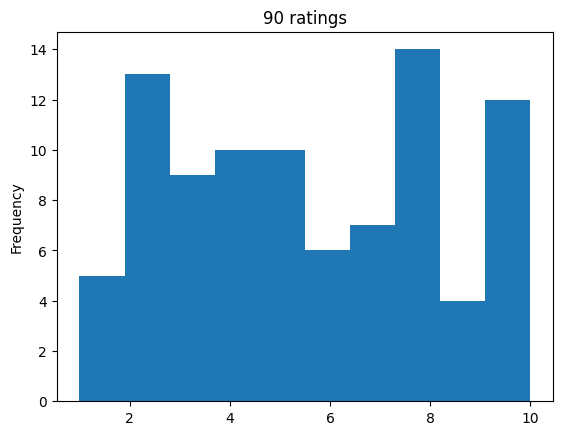

In [34]:
n = len(ratings)
pd.Series(ratings).plot(kind="hist", title=f"{n} ratings")
print("Missing rating:\n", " ".join(no_rating))

At our first cursory look at the "business" database, the objects seemed uniform in structure. However, not all reviews actually contain a rating.

We can generate a histogram of the ratings given to "Big City Restaurant"  But we need to pay attention to those reviews that do not *have* ratings. This is a typical example of missing data, as is addressed in a number of lessons in this course.

In [35]:
list(db_biz.reviews.find(
    filter={'name': 'Big City Restaurant', 'rating': None}))

[{'_id': ObjectId('67735c62e2becd6a79188e76'),
  'name': 'Big City Restaurant',
  'price': 'reasonable'},
 {'_id': ObjectId('67735c63e2becd6a791896aa'),
  'name': 'Big City Restaurant',
  'price': 'expensive'},
 {'_id': ObjectId('67735c63e2becd6a79189a2e'),
  'name': 'Big City Restaurant',
  'price': 'reasonable'}]

MongoDB and other hierarchical databases will let you match documents based on missing fields.  In this small example, there is not that much other data in each document to consider, but in real world cases there might be many and diverse fields in similar documents. 

Whether or not you need to worry about these three reviews with missing ratings is problem and domain driven.  You might want to ignore them.  You might want to perform techniques to impute values, as discussed later in this course..  In any event, you should be conscious of the fact that your data is incomplete.

#### Denormalization and Its Discontents

For performance reasons that are analogous to those in relational databases, sometimes data is denormalized in document-oriented databases.  Querying within one branch will be faster, and querying just one document will be much faster again.  Hence, administrators of document-oriented databases will commonly duplicate information into a location "closer" to where it is typically accessed.

In querying a document-oriented database, we might use code similar to this:

In [36]:
def has_best_review(name, db=db_biz):
    "Return phone if restaurant has at least one 10 rating"
    query = {'name': name, 'rating': 10}
    review = None
    
    # Fast path has phone in local results
    for review in db.reviews.find(query):
        phone = review.get('phone')
        if phone:
            return f"Call {name} at {phone}! (FAST query)"

    # If there were no ratings of 10, we don't like it!
    if not review:
        return f"Do not bother with {name}!"

    # MUCH SLOWER path is second query
    info = db.info.find_one({'name': name})
    return f"Call {name} at {info['phone']}! (SLOW query)"

Perhaps when a review is consulted numerous times (for example, if it had an actual description field), the database administrator may cache the phone number that is usually wanted within the actual review document.  Let us see how several inquiries behave.

In [37]:
has_best_review('Kitchen Tasty Inc.')

'Call Kitchen Tasty Inc. at +1 524 555 9265! (FAST query)'

In [38]:
has_best_review('City Kitchen Inc.')

'Do not bother with City Kitchen Inc.!'

In [39]:
has_best_review('Sweet Tasty Take-Out')

'Call Sweet Tasty Take-Out at +1 759 555 0158! (SLOW query)'

On its face, this all seems like reasonable performance optimization.  The problem is that *duplicated* information is information that *might be* inconsistent.  

If the phone number stored in the review is not the same as the phone number stored with the restaurant record itself, we are faced with a data integrity problem.  Presumably, at *some point* the telephone number was copied into the review document.  

It is *plausible* that the phone number was copied from the "info" branch to the "reviews" branch at the time the review was created, which would suggest that the "info" branch is more current.  However, if we need to do the extra lookup, the whole point of denormalization is defeated.

It is also *possible* that the phone number was entered with the review itself as an option.  Determining the cause of the data integrity problem, unfortunately, depends on understanding not only the code that might have run in the past, but also even the human or automated entry processes that might have occurred.

### Key/Value Stores

The simplest possible database system is a key/value store.  These systems do nothing more than map some key (usually a string) to a value (sometimes a string, sometimes compound types).  

Often these systems are used as in-memory data stores to allow the fastest possible access, often as a form of caching.  However, most of the systems that usually operate in-memory—including among distributed servers—also have some persistence mechanism such as virtual memory or snapshotting.  Other variations of key/value stores are primarily on-disk formats, but they might in turn reside primarily in cache memory, hence achieving similar speed.

**Redis** (Remote Dictionary Server) and **Memcached** are popular in-memory systems (with persistence mechanisms on the side).  Memcached, as its name suggests, is most commonly used as a cache, and is hence much less commonly a "source of knowledge."  That is, a cache frequently sits between a client and a server and simply records the previous result from a client.  If an identical request occurs again (possibly limited to some "staleness" period) then the complex database query, or difficult computation, or access to additional resources external to the server, can be skipped and the cached result is returned instead.  Redis is sometimes used this way, but is also often used as a definitive or sole source of knowledge for some element of the data needed by a server.

To illustrate this caching in pseudo-code, a server proxy might contain code similar to this:

```python
request = get_client_request()
key = hash(request)   # Collision resistant hash

# See if FAST PATH is available
if result := check_for_cache(key):
    send_to_client(result)
    
# SLOW PATH as fallback
else:
    result = expensive_operation(request)
    send_to_client(result)
    store_to_cache(key, result, expiration=duration)
```

Other key/value stores are derived from the early Unix DBM (Database Manager) system.  These include **LDBM** (Lightning Memory-Mapped Database), **GDBM** (GNU dbm), and **Berkeley DB**.  All of these simply map byte strings to other byte strings, without addressing more complex data structures.  In contrast, for example, Redis allows for values to have a rich collection of data types, including collections allowing nesting.  In practice, however, bytes are sufficient to hold any kind of data; it is just a matter of those bytes representing some serialization format, such as JSON texts, or Python pickles (the Python `shelve` module, for example, is basically just DBM coupled with pickles).

Being primarily single files on disk that store key/value pairs, DBM-family libraries occupy a similar application space with SQLite single-file databases.  Both are a way to encapsulate related data into a format that can be read universally, and depends only on a single file to be shared.  Obviously, the manner of use is different between relational and key/value stores, but the same information can easily be represented in either, and both provide their own kind of querying and updating interfaces.

In a sense, key/value stores are simple enough that they do not lend themselves to data integrity problems.  Obviously, it is always possible to store values that are simply *wrong* no matter what format is used.  But there is nothing in the structure of a mapping itself which adds special concerns. Or so it would seem.

In [40]:
biz = dbm.open('data/keyval.db')
seed(6)
# Keys are bytes; could convert to strings if desired
sample(list(biz.keys()), 10)

[b'Big Sweet Take-Out::info::phone',
 b'Big Sweet Inc.::ratings',
 b'Goat Sweet Inc.::info::phone',
 b'Fish City Restaurant//ratings',
 b'Delight Goat Inc.::ratings',
 b'DESCRIPTION',
 b'Salty Delight Take-Out::ratings',
 b'Sweet Tasty Restaurant::info::phone',
 b'Delight Salty Restaurant::info::phone',
 b'Tasty Fish Inc.::info::cuisine']

Problems arise in practice because users actually *want* hierarchy in their data.  Most keys are not useful as completely flat names.   Developers commonly invent ad hoc hierarchies in the keys used within key/value stores; this is not a necessarily a bad habit, it usually reflects a genuine requirement of the problem space.  However, these hierarchies can be especially fragile.

In [41]:
name = b"Tasty Fish Inc."
print("Overview:", biz[b"DESCRIPTION"])
print("Cuisine: ", biz[name + b"::info::cuisine"] )
print("Ratings: ", biz[name + b"::ratings"][:30], "...")

Overview: b'Restaurant information'
Cuisine:  b'Mexican'
Ratings:  b'2;1;1;10;5;7;1;4;8;10;7;7;6;8;' ...


For example, I created a DBM file that contains similar information to the restaurant database discussed above in its MongoDB format.  The hierarchy of branches is represented here using namespacing of the keys with delimiters.  This approach is quite commonplace among creators of key/value store systems. 

In [42]:
for key, val in biz.items():
    if key.startswith(b'Tasty Fish Inc.::'):
        print(key.decode(), '\t', val[:30].decode())

Tasty Fish Inc.::ratings 	 2;1;1;10;5;7;1;4;8;10;7;7;6;8;
Tasty Fish Inc.::info::phone 	 +1 935 555 8029
Tasty Fish Inc.::info::cuisine 	 Mexican


We can query on various informally hierarchical keys.

As is common, I created an informal sequence in the "ratings" value by using delimeters.  Consumers of the data will simply have to be aware that a particular value is formatted that way.  We might even use a small amount of code to pull related keys out from the _ad hoc_ hierarchy.

In [43]:
for key, val in biz.items():
    if key.startswith(b'Fish City Restaurant'):
        print(key, val[:30])

b'Fish City Restaurant::ratings' b'6;10;4;3;10;5;1;4;7;8;5;2;1;5;'
b'Fish City Restaurant//ratings' b'9'
b'Fish City Restaurant::info::phone' b'+1 851 555 1082'
b'Fish City Restaurant::info::cuisine' b'American'


The problem that arises here is that over the course of using the database, an  inconsistent convention for hierarchical keys was used.  This is a general concern, and occurs frequently in real data; it is probably especially prominent in multi-user, multi-consumer systems like Redis that are likely to communicate with tools written by many people, in many languages, over time.  Data integrity failures just tend to seep in.  For example:

Although the intent of the differently delimited hierarchical keys is easy to discern as human readers, detecting such inconsistencies can be laborious, and you risk missing information with inadequate remediation.  For these types of key/value stores, if you need to utilize their data source, a good first examination is to analyze the structure of keys themselves.  They will not always utilize an ad hoc hierarchy, but doing so is frequent.  Even if there are millions of keys rather than the hundreds in my example, that initial approach can at least assure that consistent path components exist using consistent delimiters (or other formatting of keys).

## Denouement

> Simple is better than complex.<br/>
> Complex is better than complicated.<br/>
> Flat is better than nested.<br/>
> Sparse is better than dense.<br/>
> Readability counts.<br/>–Tim Peters (The Zen of Python)

Hierarchical data often provides a much better representation of *entities* that have attributes and relationships to each other than does flat data.  In object-oriented programming, but also simply in ordinary taxonomies and ontologies, the relationships "Is-A" and "Has-A" are frequently fundamental, and neither of those is whatsoever tabular.  Or at best, even the attributes captured by *has-a* relationships are ragged and sparse, and definitely not tidy.  Moreover, *is-a* relationships are hierarchical at their core.

There is often—even usually—an impedance mismatch between hierarchical data and data science.  Many of these issues comes down to *access patterns*.  For many software applications, what interests us are particular entities that carry with them heterogeneous bundles of data, each bundle pertaining to the kind of thing the entity is an instance of.  In utilizing such applications, we only care about one *thing* (or a handful of things) at a given time.  When that is the case, hierarchical data structures can often be both more efficient and conceptually closer to the underlying ideas the data represents.

When we do data science, whether it is general statistics, data visualization, or machine learning models, we are concerned with collections of records or samples that are homogeneous in regard to our purpose or goal.  Yes, there may be missing data concerns such as those addressed in lessons on *Anomaly Detection* and *Data Quality*, but those do not dominate our analysis.  Data science is about summarization and aggregation.  It is almost never about individual entities in themselves.

Therefore, when provided with hiearchical data as data scientists, we need to articulate what a tree respresents that can be expressed in terms of homogeneous samples.  What fields or features abstract from the hierarchical structure and express something in common among numerous entities.  Those entities need not be leaves of the trees (although that is common), it might also be properties that can be extracted or extrapolated from different branches, which are useful and meaningful to summarize, model, and aggregate.

In the next lesson we look at a number of additional data formats, including web data, PDFs, images and custom text and binary formats.